In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [3]:
df=pd.read_csv('cleaned-disease.csv')

In [6]:
x = df.iloc[:,1:].values
y = df['Disease'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [8]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(8, 8), dpi=150)
    
    y_pred = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
    
    sns.heatmap(df_cm, annot=True)

In [12]:
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy : {acc*100:.4f} %\n")
    print("Classification report: \n")
    print(report)

In [9]:
lr_model = LogisticRegression(solver='saga', max_iter=2500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=2500, solver='saga')

In [13]:
create_report(lr_model, X_test, y_test)

Accuracy : 92.7846 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.90      0.83      0.86        23
                                   AIDS       0.78      1.00      0.88        21
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       1.00      0.83      0.91        24
                                Allergy       0.70      0.96      0.81        24
                              Arthritis       1.00      0.92      0.96        25
                       Bronchial Asthma       0.71      0.81      0.76        21
                   Cervical spondylosis       0.68      0.79      0.73        19
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       0.86      0.90      0.88        21
                            Common Cold       1.00      1.00 

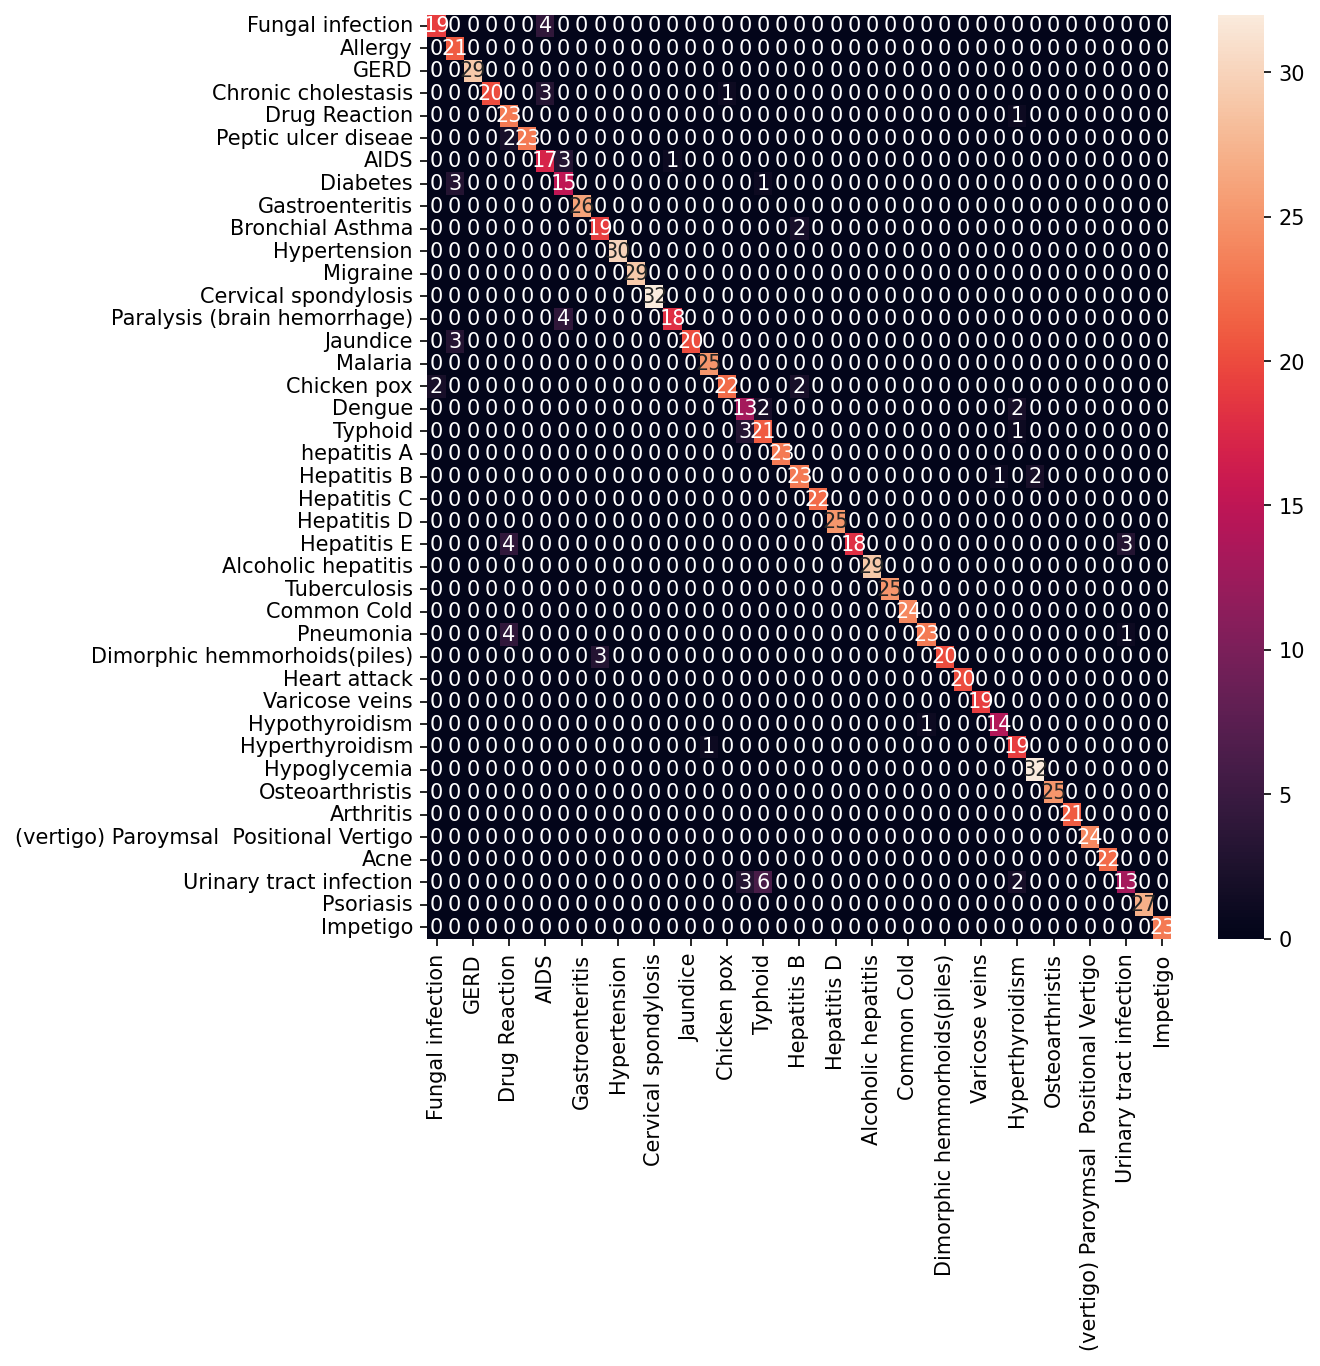

In [14]:
confusion_plot(lr_model, X_test, y_test)

In [15]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [16]:
create_report(svc_model, X_test, y_test)

Accuracy : 93.9024 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.83      0.83      0.83        23
                                   AIDS       1.00      1.00      1.00        21
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       0.95      0.88      0.91        24
                                Allergy       0.79      0.96      0.87        24
                              Arthritis       0.85      0.92      0.88        25
                       Bronchial Asthma       0.94      0.71      0.81        21
                   Cervical spondylosis       0.76      1.00      0.86        19
                            Chicken pox       1.00      0.92      0.96        26
                    Chronic cholestasis       0.83      0.90      0.86        21
                            Common Cold       1.00      1.00 

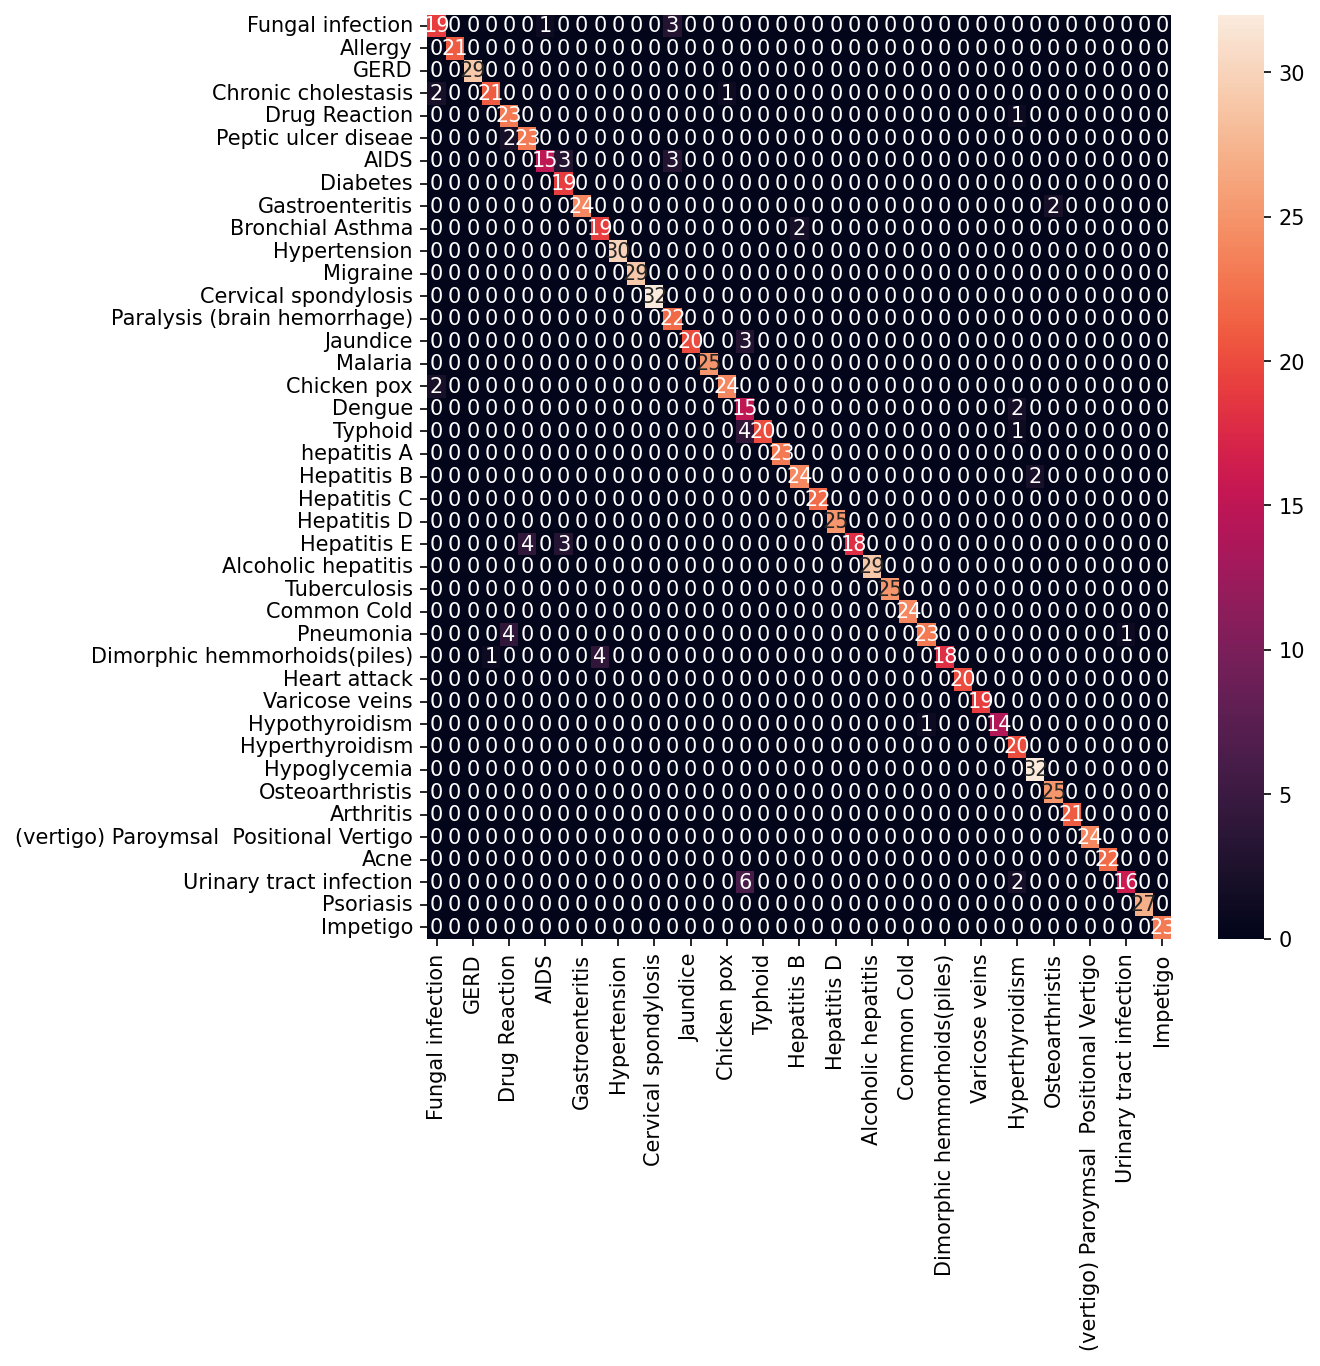

In [17]:
confusion_plot(svc_model, X_test, y_test)

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
create_report(knn_model, X_test, y_test)

Accuracy : 99.5935 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        21
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.89      1.00      0.94        24
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        21
                   Cervical spondylosis       0.95      1.00      0.97        19
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00 

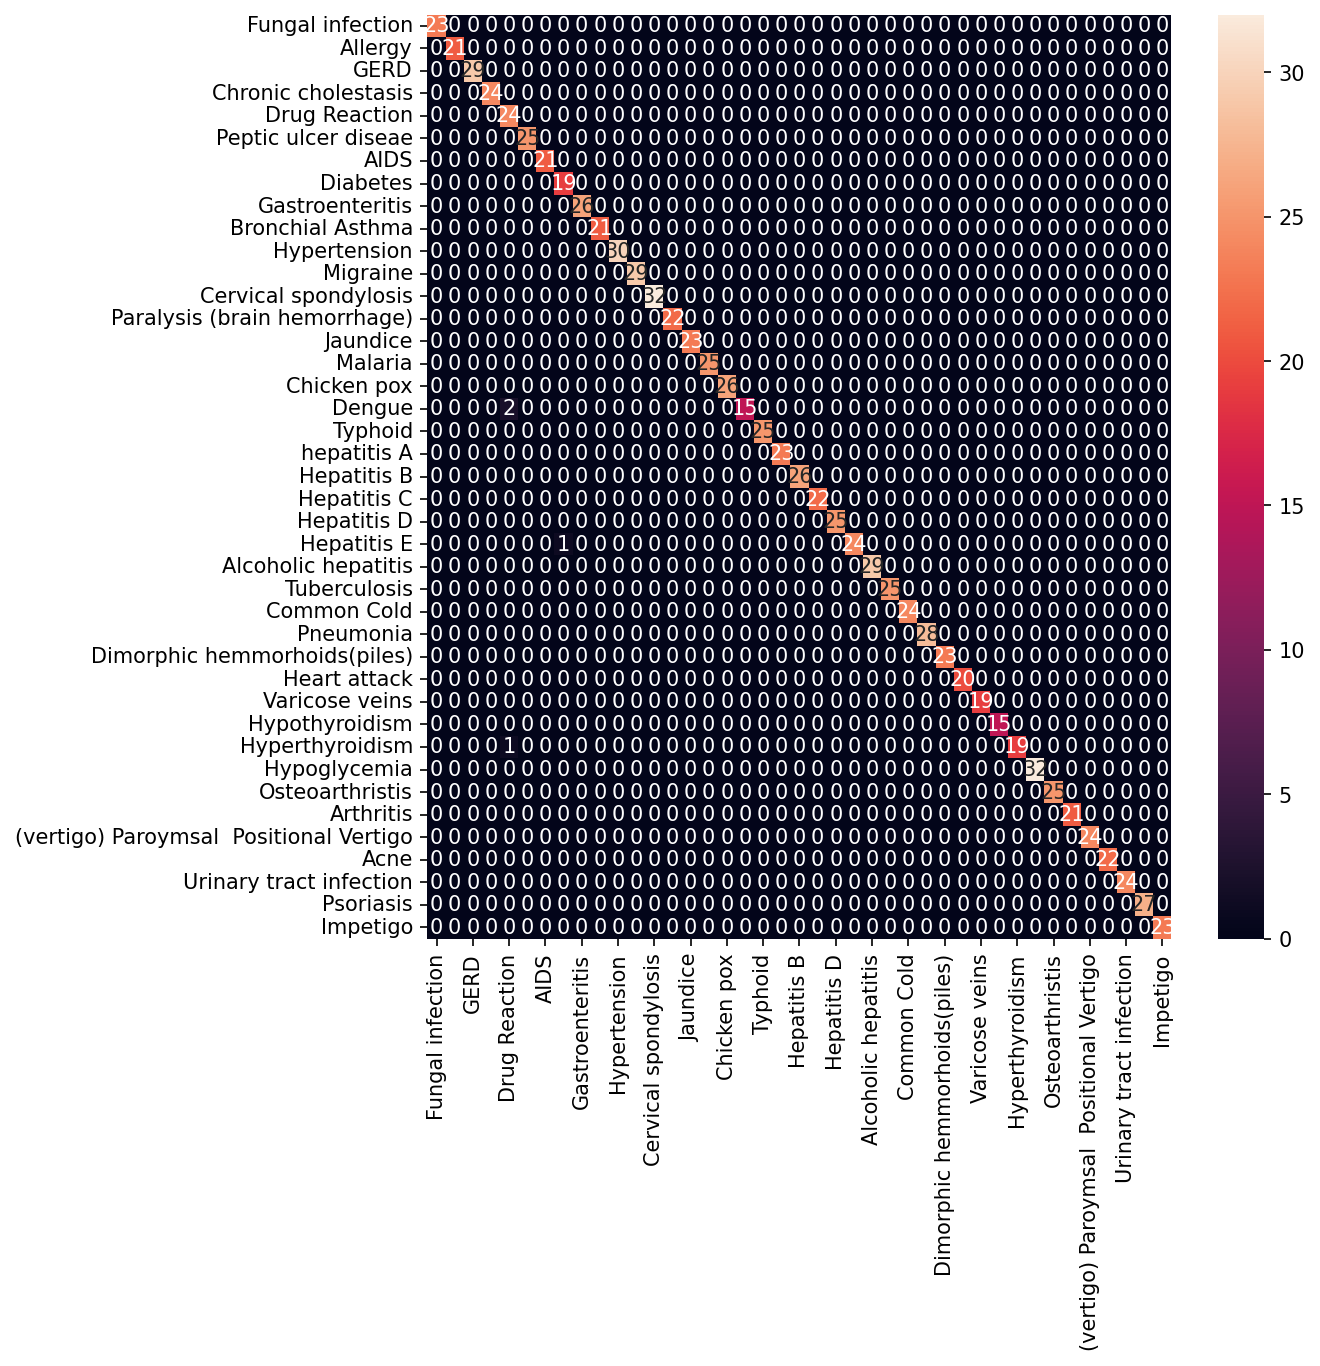

In [20]:
confusion_plot(knn_model, X_test, y_test)

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
create_report(rf_model, X_test, y_test)

Accuracy : 99.5935 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        21
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.89      1.00      0.94        24
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        21
                   Cervical spondylosis       0.95      1.00      0.97        19
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00 

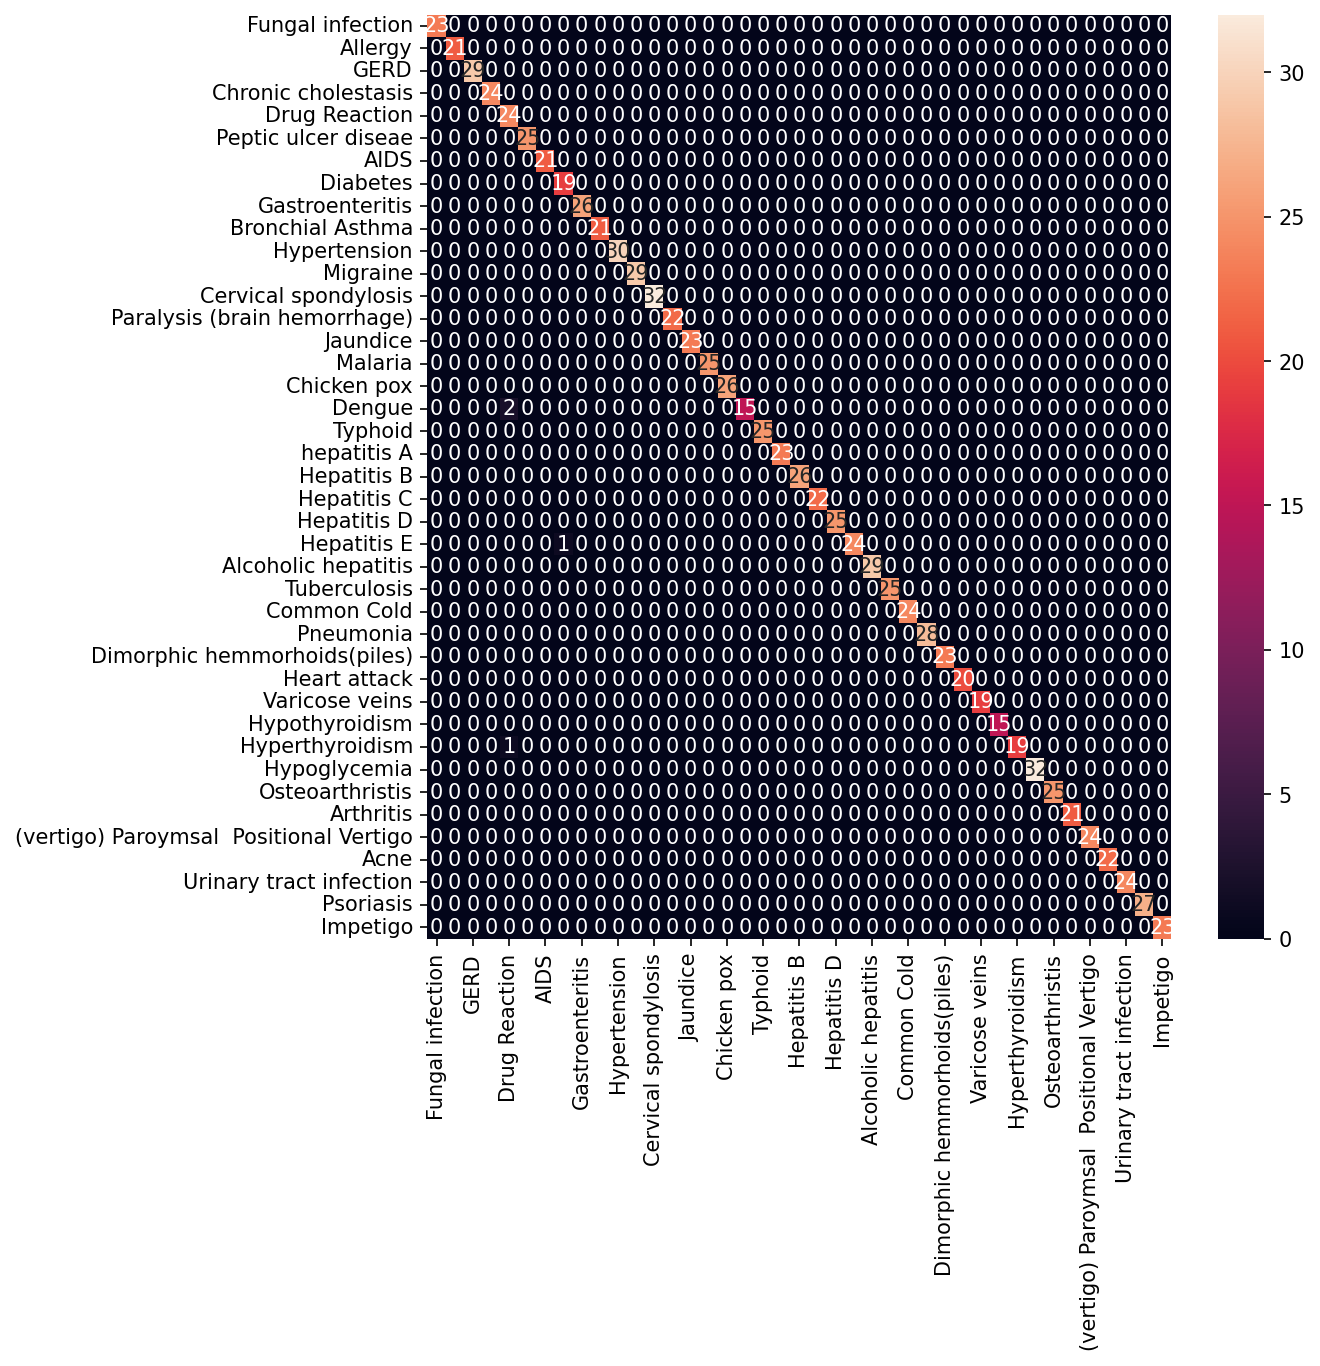

In [23]:
confusion_plot(rf_model, X_test, y_test)